## Importação de Bibliotecas

Nesta célula, importei as bibliotecas necessárias para o projeto:

- **NumPy**: Para operações matemáticas e manipulação de arrays.
- **Pandas**: Para leitura, manipulação e análise de dados.
- **Matplotlib** e **Seaborn**: Para visualização de dados.
- **SciPy**: Para testes estatísticos.
- **Scikit-learn**: Para pré-processamento de dados, criação de modelos e avaliação de performance.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


## Carregamento dos Dados

Nesta célula, se encontra o conjunto de dados de vendas do e-commerce a partir de um arquivo CSV e as primeiras linhas para obter uma visão geral do conteúdo.


In [2]:
df = pd.read_csv('Arquivos/supermarket_sales.csv')

df.head() 


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Estatísticas Descritivas das Colunas Numéricas

Nesta célula, selecionei as colunas numéricas do dataset e usei o describe para estatísticas descritivas, como média, desvio padrão, valores mínimo e máximo, entre outros.


In [74]:
# Selecionando as colunas numéricas
num_colunas = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

# Calculando as estatísticas descritivas
df[num_colunas].describe()



,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## Cálculo da Média e Desvio Padrão das Vendas Totais

Nesta célula, calculei a média e o desvio padrão das vendas totais para entender a dispersão dos dados de vendas.

In [75]:
# Calculando média e desvio padrão das vendas
media_vendas = df['Total'].mean()
desvio_padrao_vendas = df['Total'].std()

print(f"Média das Vendas Totais: {media_vendas}")
print(f"Desvio Padrão das Vendas Totais: {desvio_padrao_vendas}")


Média das Vendas Totais: 322.966749
Desvio Padrão das Vendas Totais: 245.88533510097187


## Distribuição das Vendas Totais

Nesta célula, criei um histograma para visualizar a distribuição das vendas totais. O histograma é acompanhado por uma curva de densidade (KDE) para representar a distribuição dos dados de forma mais suave.

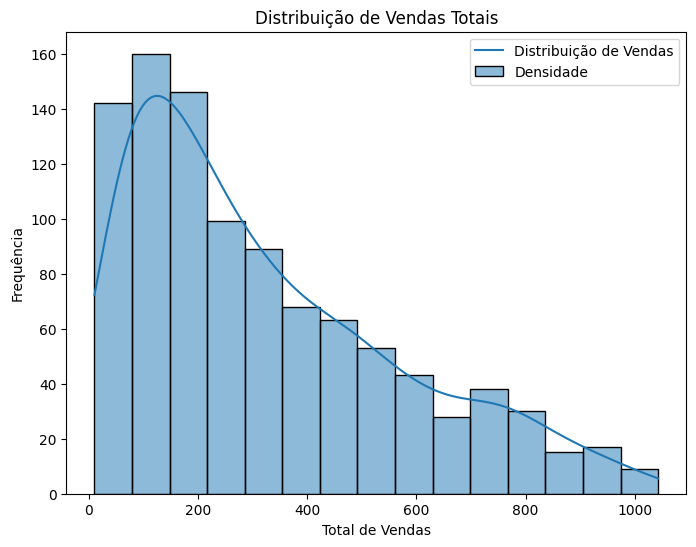

In [76]:
# histograma da variável 'Total'
plt.figure(figsize=(8,6))
sns.histplot(df['Total'], kde=True)
plt.title('Distribuição de Vendas Totais')
plt.xlabel('Total de Vendas')
plt.ylabel('Frequência')
plt.legend(['Distribuição de Vendas', 'Densidade'])
plt.show()


## Tendência de Vendas ao Longo do Tempo

Nesta célula, converti a coluna `Date` para o formato datetime e agrupamos as vendas totais por data para visualizar a tendência das vendas ao longo do tempo.


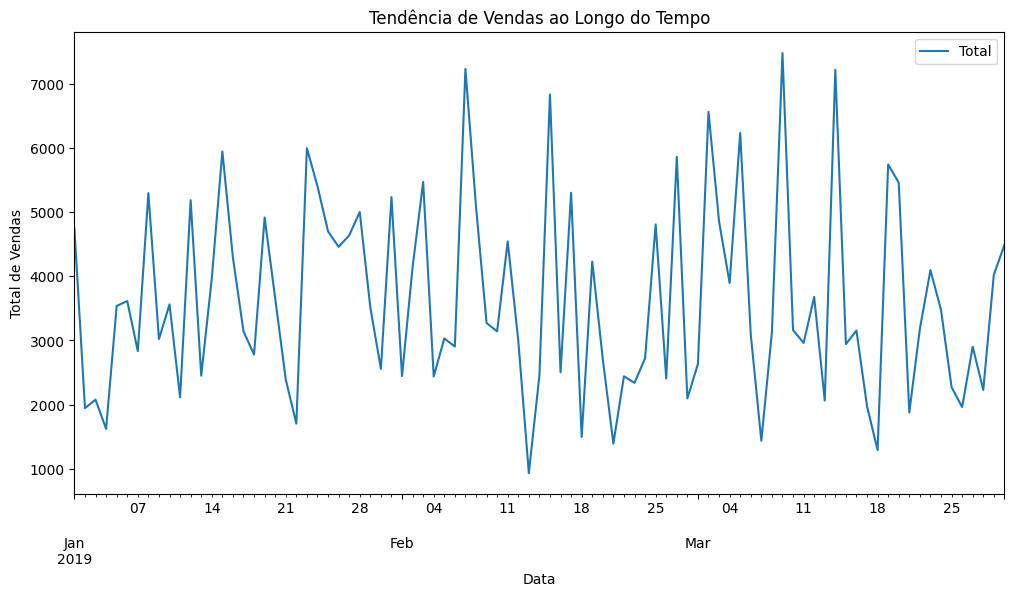

In [77]:
# Convertendo a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agrupando vendas por data
vendas_por_data = df.groupby('Date')['Total'].sum()

# Visualização da tendência ao longo do tempo
plt.figure(figsize=(12,6))
vendas_por_data.plot()
plt.title('Tendência de Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.legend()
plt.show()


## Distribuição das Vendas por Linha de Produto

Nesta célula, criei um boxplot para visualizar a distribuição das vendas por linha de produto. O boxplot ajuda a entender a variação das vendas em diferentes categorias de produtos, destacando valores extremos e a dispersão dos dados.

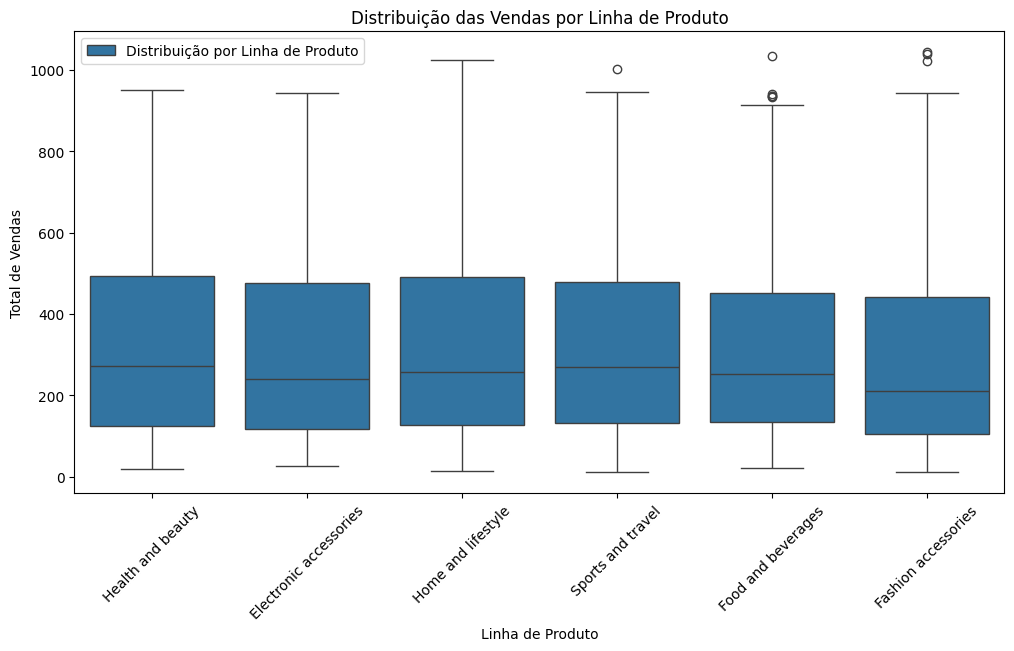

In [78]:
# Boxplot das vendas por linha de produto
plt.figure(figsize=(12,6))
sns.boxplot(x='Product line', y='Total', data=df)
plt.title('Distribuição das Vendas por Linha de Produto')
plt.xlabel('Linha de Produto')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.legend(['Distribuição por Linha de Produto'])
plt.show()


## Teste ANOVA para Comparação das Vendas por Linha de Produto

Nesta célula, apliquei o teste ANOVA para verificar se há diferenças nas vendas entre as diferentes linhas de produtos. O teste ANOVA ajuda a determinar se as médias das vendas entre diferentes categorias de produtos são estatisticamente diferentes.


In [79]:
# Agrupando as vendas por linha de produto
vendas_por_produto = df.groupby('Product line')['Total'].apply(list)

# Aplicando o teste ANOVA
f_valor, p_valor = stats.f_oneway(*vendas_por_produto)

print(f"Valor de F: {f_valor:.2f}")
print(f"Valor de p: {p_valor:.4f}")

if p_valor < 0.05:
    print("Possui grandes diferenças nas vendas entre as diferentes linhas de produtos")
else:
    print("Não possui grandes diferenças nas vendas entre as diferentes linhas de produtos")


Valor de F: 0.34
Valor de p: 0.8900
Não possui grandes diferenças nas vendas entre as diferentes linhas de produtos


## Teste T para Comparação das Vendas entre Cidades

Nesta célula, foi utilizado o teste t para duas amostras independentes para comparar as vendas totais entre duas cidades: Yangon e Naypyitaw. O teste t é usado para determinar se há diferenças significativas nas médias das vendas entre as duas cidades.

In [80]:
# Dividindo os dados em duas cidades
vendas_cidade1 = df[df['City'] == 'Yangon']['Total']
vendas_cidade2 = df[df['City'] == 'Naypyitaw']['Total']

# Aplicando o teste t para duas amostras
t_valor, p_valor = stats.ttest_ind(vendas_cidade1, vendas_cidade2)

print(f"Valor de Cidade 1: {t_valor:.2f}")
print(f"Valor de Cidade 2: {p_valor:.4f}")

if p_valor < 0.05:
    print("Há diferenças significativas nas vendas entre as duas cidades.")
else:
    print("Não há diferenças significativas nas vendas entre as duas cidades.")


Valor de Cidade 1: -1.29
Valor de Cidade 2: 0.1971
Não há diferenças significativas nas vendas entre as duas cidades.


## Preparação dos Dados para Modelagem

Nesta célula, selecionei as variáveis independentes e a variável dependente para a modelagem. Em seguida, dividi os dados em conjuntos de treino e teste e padronizei as características para garantir que todas tenham a mesma escala.

In [94]:
# Selecionando as variáveis independentes e dependentes
X = df[['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income']]
y = df['Total']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Criação e Treinamento do Modelo de Regressão Ridge

Nesta célula, criei e treinei o modelo para prever as vendas totais. No entanto, devido à limitação do tamanho do dataset, tive um problema de underfitting nos resultados. Para melhorar o desempenho do modelo, testei diferentes tipos de Regressão, incluindo Regressão Lasso e Linear no fim optei por deixar a de Ridge. mesmo assim os resultados obtidos ainda não foram satisfatórios.

In [99]:
# Criando e treinando o modelo de Regressão Ridge
modelo_ridge = Ridge(alpha=1.0)  # Ajuste o valor de alpha conforme necessário
modelo_ridge.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_ridge = modelo_ridge.predict(X_test_scaled)

# Avaliando o modelo
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Erro Quadrático Médio (MSE) com Ridge: {mse_ridge:.2f}")
print(f"R² com Ridge: {r2_ridge:.2f}")


Erro Quadrático Médio (MSE) com Ridge: 0.08
R² com Ridge: 1.00


## Previsões vs. Valores Reais

Nesta célula, criei um gráfico de dispersão para comparar as previsões do modelo de Regressão Ridge com os valores reais das vendas.

Observação: O modelo de Regressão Ridge apresentou sinais de underfitting, o que pode estar relacionado ao tamanho da base de dados.

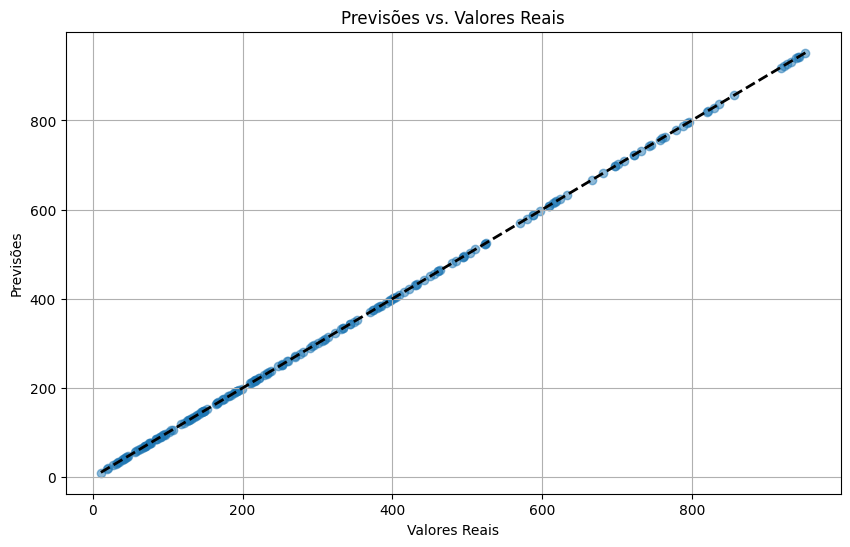

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.title('Previsões vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Linha de identidade
plt.grid(True)
plt.show()
